In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/amazon_products_dataset.csv'
df = pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0


In [ ]:
df.isnull().sum()
df.fillna({"category":"unknown"},inplace=True)

r_mean = df['rating'].mean()
rc_median = df["rating_count"].median()
df.fillna({'rating':r_mean,"rating_count":rc_median},inplace=True)
df.dropna(subset=["actual_price","discount_price"], inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81919 entries, 0 to 81918
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     81919 non-null  int64  
 1   user_id     81919 non-null  int64  
 2   rating      81919 non-null  float64
 3   timestamp   81918 non-null  object 
 4   model_attr  81918 non-null  object 
 5   category    81919 non-null  object 
 6   brand       81919 non-null  object 
 7   year        81918 non-null  float64
 8   user_attr   7930 non-null   object 
 9   split       81918 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 6.3+ MB


In [ ]:
df.isnull().sum()

,0
title,0
brand,0
category,0
actual_price,0
discount_price,0
rating,0
rating_count,0


In [ ]:
new_df = df[df["brand"] != "unknown"]
brand_counts = new_df.groupby('brand').size()
highest_product_brand = brand_counts.idxmax()
print(f"The brand with the highest number of products is: {highest_product_brand}")

The brand with the highest number of products is: Boat


In [ ]:
new_df=df.sort_values(by='actual_price',ascending=False)
new_df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count
1380,Android Tablet,JBL,Laptop,79993.0,78094.0,3.0,7666.0
1971,Gaming Laptop,LG,Monitor,79869.0,77173.0,2.6,5232.0
1400,4K Action Camera,Sony,Headphones,79857.0,77469.0,2.7,1379.0
1348,Android Tablet,Sony,Monitor,79853.0,78831.0,4.8,7596.0
42,Gaming Laptop,Apple,Smartwatch,79826.0,76919.0,3.8,10252.0


In [ ]:
df.groupby("brand")["discount_price"].mean()

,discount_price
brand,
Apple,35889.731579
Boat,36353.115888
Dell,37570.078531
HP,38354.180583
JBL,37380.390821
LG,35271.735749
Mi,36542.437569
OnePlus,39090.550490
Samsung,37937.254412


In [ ]:
df[(df['rating']>=4.5) & (df['rating_count']>=2000)]

,title,brand,category,actual_price,discount_price,rating,rating_count
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
32,4K Action Camera,OnePlus,Smartphone,7793.0,5953.0,4.6,5066.0
51,Wireless Bluetooth Headphones,Dell,Headphones,61569.0,59372.0,4.5,13402.0
52,Laptop with SSD Storage,Boat,Smartwatch,76286.0,75621.0,5.0,7433.0
59,Gaming Laptop,Samsung,Tablet,45250.0,44710.0,4.7,4643.0
...,...,...,...,...,...,...,...
1946,Portable Bluetooth Speaker,OnePlus,Tablet,59325.0,55777.0,4.5,19070.0
1967,Android Tablet,Boat,Camera,20841.0,17765.0,4.5,10252.0
1972,Wireless Bluetooth Headphones,Samsung,Smartwatch,31973.0,27058.0,4.5,4288.0
1979,Wireless Bluetooth Headphones,HP,Camera,15343.0,10814.0,4.5,7851.0


In [ ]:
df.groupby('category')["actual_price"].mean()

,actual_price
category,
Camera,40352.246094
Headphones,39576.147679
Laptop,40822.874477
Monitor,40064.947761
Smartphone,37909.529412
Smartwatch,38316.913934
Speaker,39683.795276
Tablet,39943.815217
unknown,33610.500000


In [ ]:
df['discount_percent']=((df['actual_price']-df['discount_price'])/df['actual_price'])*100
df['discount_percent']

,discount_percent
0,6.608957
1,4.184451
2,8.988944
3,7.145786
4,8.546644
...,...
1992,16.313173
1993,1.359837
1994,12.660361
1995,11.831162


In [ ]:
def get_price_category(a):
  if a<500:
    return "budget"
  elif a>=500 and a<2000:
    return "MidRange"
  else:
    return "premium"
df['price_category']=df['actual_price'].apply(get_price_category)
df['price_category'].head()

,price_category
0,premium
1,premium
2,premium
3,premium
4,premium


In [ ]:
import numpy as np
df['popularity_score'] = df['rating'] * np.log(df['rating_count'] + 1)
df['popularity_score'].head()

,popularity_score
0,19.924860
1,22.795289
2,14.879318
3,36.156019
4,46.858883


In [ ]:
df.sort_values(by='popularity_score',ascending=False)
df.head(10)

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957,premium,19.924860
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451,premium,22.795289
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944,premium,14.879318
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786,premium,36.156019
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,premium,46.858883
5,Gaming Laptop,Mi,Smartwatch,17009.0,12349.0,1.7,14179.0,27.397260,premium,16.251299
6,Smartphone with AMOLED Display,OnePlus,Laptop,10026.0,5451.0,3.4,18262.0,45.631358,premium,33.362950
7,Smart Fitness Watch,Sony,Laptop,61124.0,56399.0,2.7,9675.0,7.730188,premium,24.778990
8,High Resolution Monitor,Boat,Monitor,40842.0,39232.0,2.8,309.0,3.942020,premium,16.062402
9,4K Action Camera,Dell,Speaker,20545.0,16733.0,2.0,3952.0,18.554393,premium,16.564460


In [ ]:
df[(df['price_category']=="premium") & (df['discount_percent']>40)]

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
6,Smartphone with AMOLED Display,OnePlus,Laptop,10026.0,5451.0,3.4,18262.0,45.631358,premium,33.362950
20,4K Action Camera,OnePlus,Headphones,4378.0,103.0,2.7,6412.0,97.647328,premium,23.668423
53,Noise Cancelling Earbuds,JBL,Camera,2335.0,1338.0,3.4,11284.0,42.698073,premium,31.726181
74,High Resolution Monitor,Boat,Monitor,5137.0,440.0,1.1,3605.0,91.434690,premium,9.009390
104,High Resolution Monitor,Sony,Tablet,4933.0,1146.0,2.3,19888.0,76.768701,premium,22.765221
...,...,...,...,...,...,...,...,...,...,...
1790,High Resolution Monitor,Mi,Headphones,3620.0,1463.0,4.0,17890.0,59.585635,premium,39.168212
1831,Wireless Bluetooth Headphones,Boat,Headphones,5377.0,790.0,1.4,619.0,85.307792,premium,9.001607
1838,Noise Cancelling Earbuds,OnePlus,Smartwatch,5877.0,1234.0,3.0,4039.0,79.002893,premium,24.912000
1872,Wireless Bluetooth Headphones,Dell,Laptop,11037.0,6048.0,1.1,15668.0,45.202501,premium,10.625383


In [ ]:
df[df['title'].str.contains('Bluetooth', na=False)]

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
14,Portable Bluetooth Speaker,OnePlus,Camera,25516.0,24050.0,1.7,16989.0,5.745415,premium,16.558646
18,Portable Bluetooth Speaker,Sony,Monitor,73590.0,69414.0,3.8,9759.0,5.674684,premium,34.906981
21,Wireless Bluetooth Headphones,Samsung,Speaker,78689.0,76240.0,2.9,10196.0,3.112252,premium,26.766562
23,Portable Bluetooth Speaker,HP,Smartwatch,4342.0,4235.0,1.4,4820.0,2.464302,premium,11.873031
25,Wireless Bluetooth Headphones,Boat,Monitor,14689.0,13286.0,3.7,1849.0,9.551365,premium,27.834881
...,...,...,...,...,...,...,...,...,...,...
1972,Wireless Bluetooth Headphones,Samsung,Smartwatch,31973.0,27058.0,4.5,4288.0,15.372345,premium,37.637140
1976,Wireless Bluetooth Headphones,Sony,Monitor,65124.0,61923.0,3.3,16581.0,4.915239,premium,32.063041
1979,Wireless Bluetooth Headphones,HP,Camera,15343.0,10814.0,4.5,7851.0,29.518347,premium,40.358356
1982,Wireless Bluetooth Headphones,Mi,Smartwatch,50527.0,45694.0,2.8,3692.0,9.565183,premium,22.999744


In [ ]:
popularity_score_70th_percentile = df['popularity_score'].quantile(0.70)

filtered_df = df[
    (df['rating'] >= 4.0) &
    (df['discount_percent'].between(20, 50)) &
    (df['popularity_score'] >= popularity_score_70th_percentile)
]

print("Filtered products:")
(filtered_df.head())

Filtered products:


,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
32,4K Action Camera,OnePlus,Smartphone,7793.0,5953.0,4.6,5066.0,23.610933,premium,39.240319
94,Smart Fitness Watch,HP,Monitor,16289.0,12756.0,4.4,19798.0,21.689484,premium,43.530902
107,High Resolution Monitor,JBL,Smartphone,7308.0,4789.0,4.3,19050.0,34.469075,premium,42.375962
140,Gaming Laptop,Sony,Tablet,11869.0,8696.0,5.0,3124.0,26.733507,premium,40.235948
162,Android Tablet,Apple,Speaker,11918.0,8193.0,4.6,14639.0,31.255244,premium,44.120959


In [ ]:
df.groupby('brand')['discount_percent'].mean()

,discount_percent
brand,
Apple,12.721996
Boat,12.546502
Dell,11.165004
HP,11.501202
JBL,11.370137
LG,11.559797
Mi,10.162308
OnePlus,11.380987
Samsung,10.805965


In [ ]:
new_df=df.groupby("price_category")['discount_price'].mean()
new_df.sort_values().head(1)

,discount_price
price_category,
budget,284.34


In [ ]:
# Calculate revenue potential
df["revenue_potential"] = df["actual_price"] * df["rating_count"]

# Group by brand and sum
brand_revenue = df.groupby("brand")["revenue_potential"].sum().reset_index()
brand_revenue

,brand,revenue_potential
0,Apple,6.705514e+10
1,Boat,7.744207e+10
2,Dell,7.549826e+10
3,HP,8.297444e+10
4,JBL,7.723438e+10
5,LG,8.089876e+10
6,Mi,7.698029e+10
7,OnePlus,8.247380e+10
8,Samsung,8.116852e+10
9,Sony,7.868645e+10


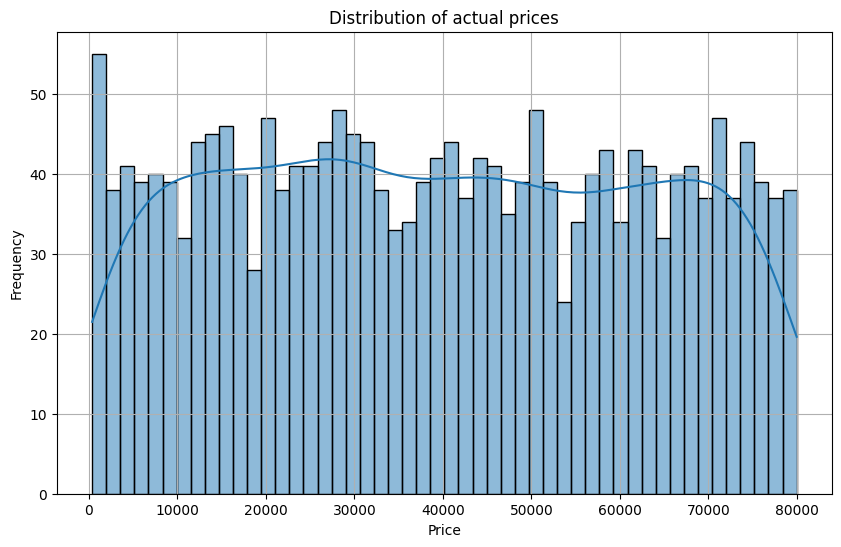

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['actual_price'], kde=True, bins=50)
plt.title('Distribution of actual prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

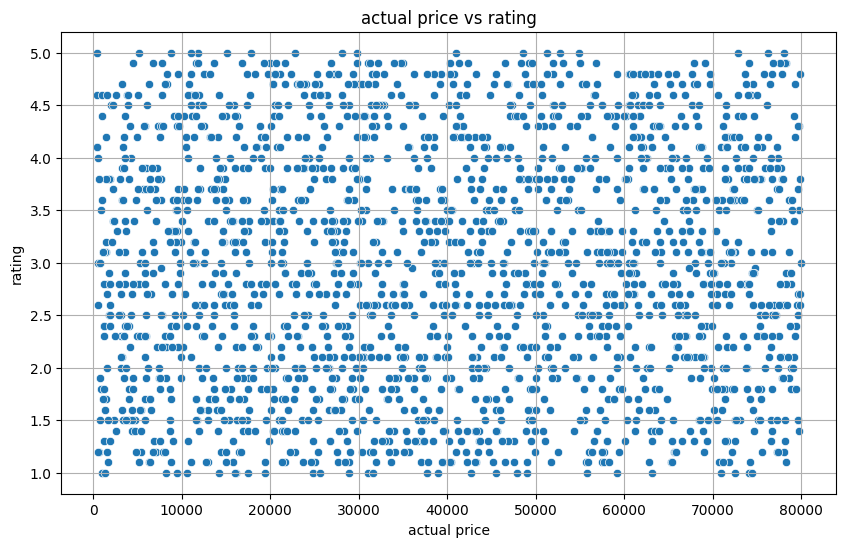

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="actual_price",y='rating',data=df)
plt.title('actual price vs rating')
plt.xlabel('actual price')
plt.ylabel('rating')
plt.grid(True)
plt.show()

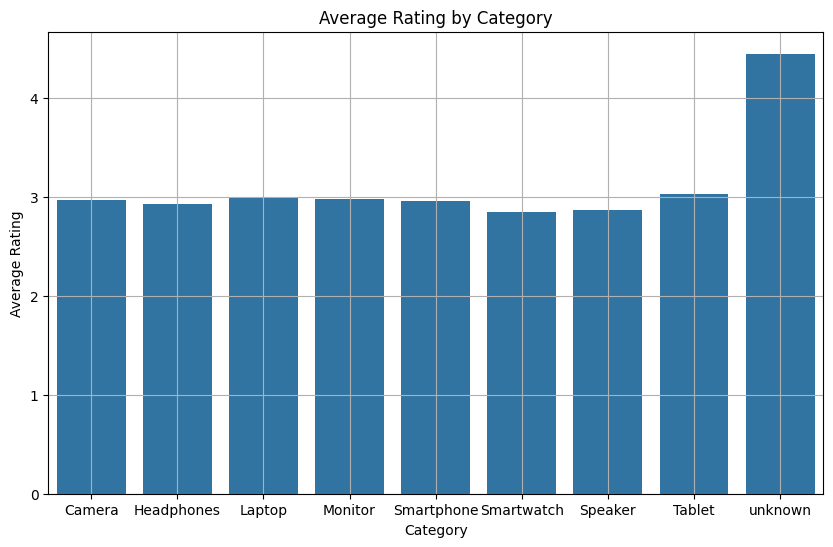

In [ ]:
new_df = df.groupby("category")["rating"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="category", y="rating", data=new_df)

plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.dropna(subset=["deck"],inplace=True)
a_m = df['age'].mean()
df['age']=df['age'].fillna(a_m)
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
missing= pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by="missing_percent",ascending=False)

,missing_count,missing_percent
embark_town,2,0.985222
pclass,0,0.000000
survived,0,0.000000
age,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
sex,0,0.000000
fare,0,0.000000
embarked,0,0.000000
who,0,0.000000


In [ ]:
# Duplicates & data type check
print("Duplicate rows: ", df.duplicated().sum())

# Convert some columns to category type
df['class'] = df['class'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

df.info()


Duplicate rows:  1
<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     203 non-null    int64   
 1   pclass       203 non-null    int64   
 2   sex          203 non-null    category
 3   age          203 non-null    float64 
 4   sibsp        203 non-null    int64   
 5   parch        203 non-null    int64   
 6   fare         203 non-null    float64 
 7   embarked     203 non-null    category
 8   class        203 non-null    category
 9   who          203 non-null    object  
 10  adult_male   203 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  201 non-null    object  
 13  alive        203 non-null    object  
 14  alone        203 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(4), object(3)
memory usage: 17.8+ KB


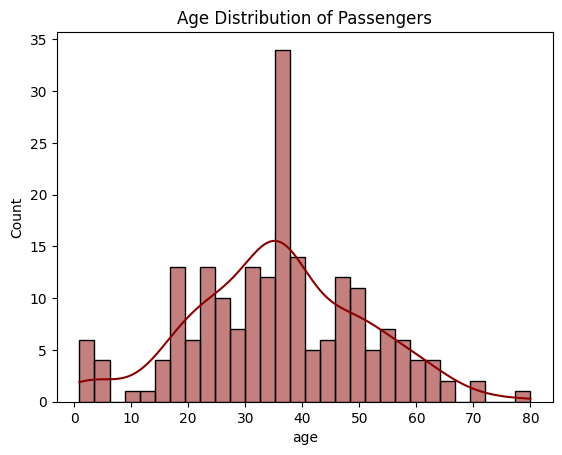

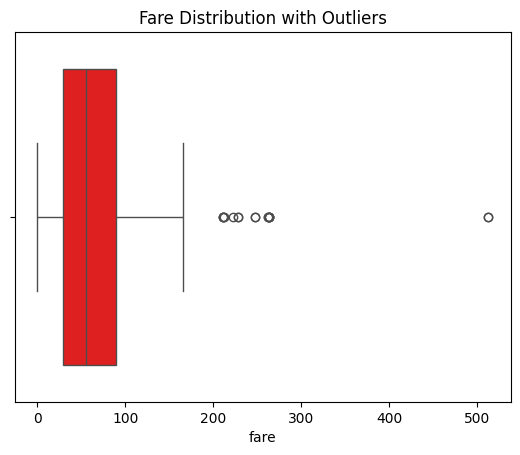

In [ ]:

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].describe()
sns.histplot(df['age'], bins=30, kde=True, color='darkred')
plt.title("Age Distribution of Passengers")
plt.show()
sns.boxplot(x=df['fare'], color='red')
plt.title("Fare Distribution with Outliers")
plt.show()


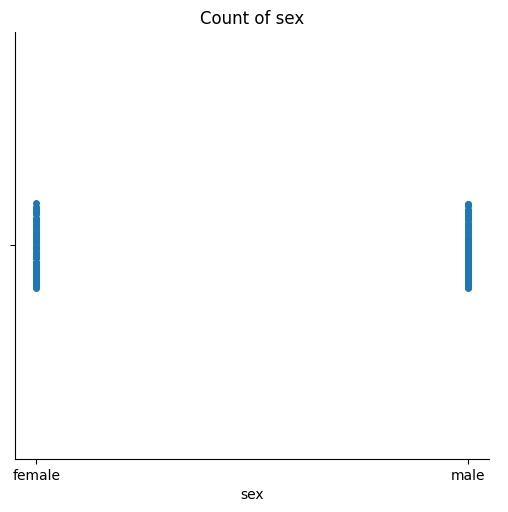

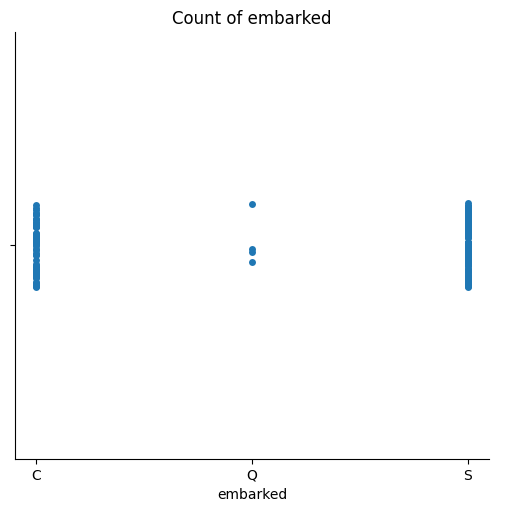

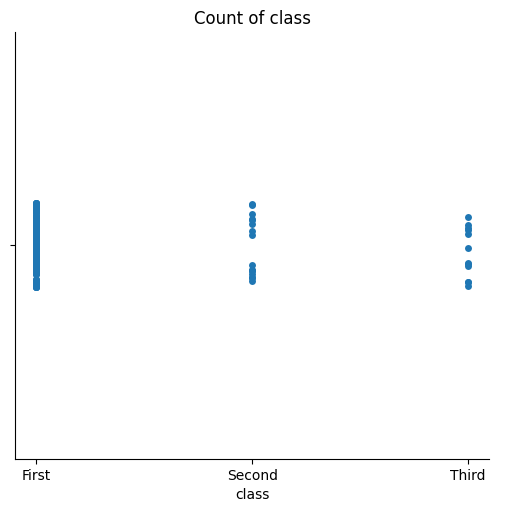

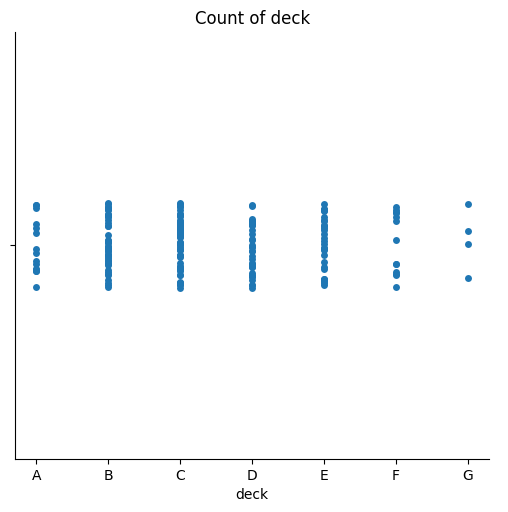

In [ ]:
cat_clos = df.select_dtypes('category').columns

for col in cat_clos:
    sns.catplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()


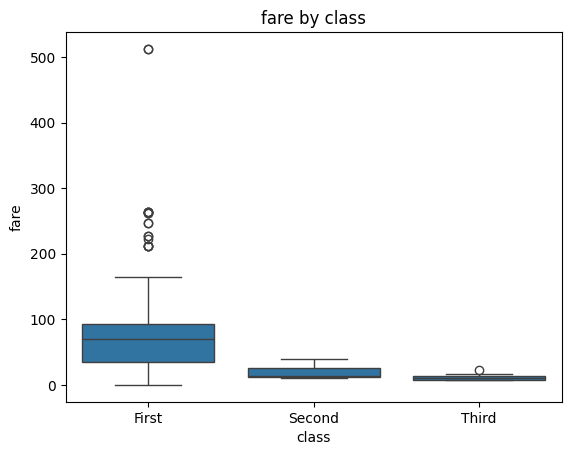

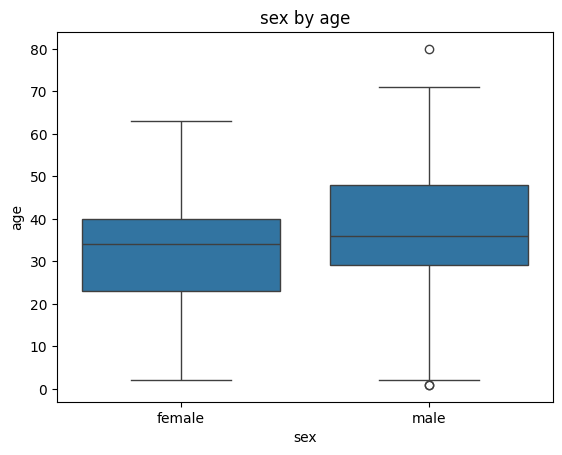

In [ ]:
sns.boxplot(x='class',y='fare',data = df)
plt.title('fare by class')
plt.show()
sns.boxplot(x='sex',y='age',data=df)
plt.title('sex by age')
plt.show()

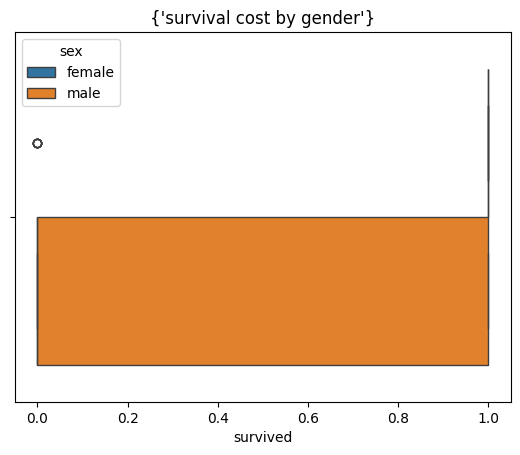

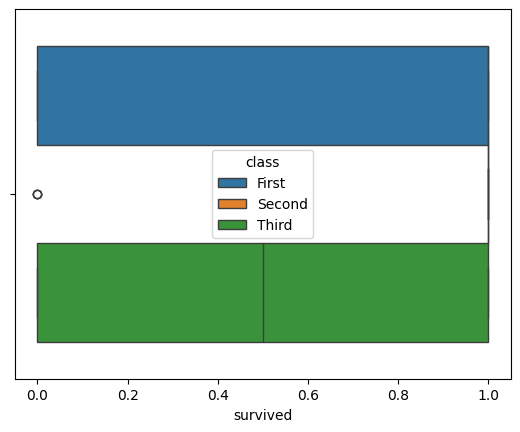

In [ ]:
sns.boxplot(x="survived",hue='sex',data=df)
plt.title({"survival cost by gender"})
plt.show()
sns.boxplot(x='survived',hue='class',data=df)
plt.show()

number of outliers 17


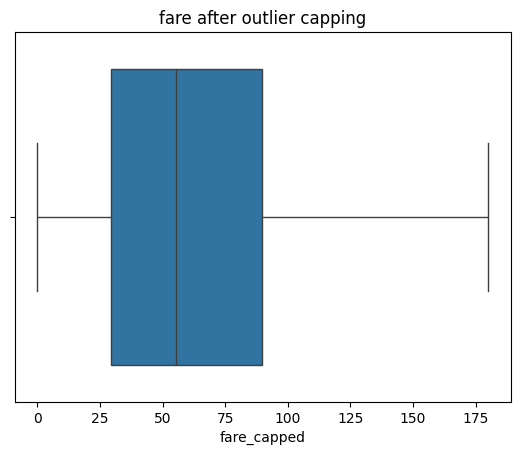

In [ ]:
q1=df['fare'].quantile(0.25)
q2=df['fare'].quantile(0.75)
iqr=q2-q1
lower = q1-1.5*iqr
upper = q2+1.5*iqr
outliers=df[(df['fare']<lower)|(df['fare']>upper)]
print("number of outliers",len(outliers))
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("fare after outlier capping")
plt.show()

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path1 = '/content/drive/My Drive/features.csv'
df1 = pd.read_csv(path1)



path2 = '/content/drive/My Drive/stores.csv'
df2 = pd.read_csv(path2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df2.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
mdf = pd.merge(
    df1,
    df2,
    on='Store',
    how='left'
)
mdf

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [ ]:
mdf.head()
mdf.shape
mdf.info()
mdf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 839.9+ KB


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,130287.600000
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,63115.971429
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,34875.000000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,70713.000000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,126512.000000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,202307.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.000000


In [ ]:
mdf.dtypes

,0
Store,int64
Date,object
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64
MarkDown4,float64
MarkDown5,float64
CPI,float64


In [ ]:
mdf.groupby('Store')['Store'].count()

,Store
Store,
1,182
2,182
3,182
4,182
5,182
6,182
7,182
8,182
9,182


In [ ]:
mdf.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


In [ ]:
import pandas as pd
import numpy as np

num_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    df[col] = df[col].fillna(df[col].mean())

df['Date'] = pd.to_datetime(df['Date'])

df = df.drop_duplicates()

df = df.reset_index(drop=True)

# Check final result
df.info()
df.head()


In [24]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)
df.head()
df.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
df.dropna(subset=["customerID","gender"],inplace = True)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [26]:
numeric_cols =['tenure','MonthlyCharges','TotalCharges']
categorical_cols = [col for col in df.columns if col not in numeric_cols]
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
# 1. tenure_group
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 36, 60, float('inf')],
    labels=["New", "Regular", "Loyal", "Champion"],
    include_lowest=True
)

# 2. monthly_charge_segment
df['monthly_charge_segment'] = pd.cut(
    df['MonthlyCharges'],
    bins=[-float('inf'), 30, 70, float('inf')],
    labels=["Low", "Medium", "High"]
)

# 3. has_internet_service
df['has_internet_service'] = df['InternetService'].map({
    "DSL": 1,
    "Fiber optic": 1,
    "No": 0
}).fillna(0)

# 4. is_multi_line_user
df['is_multi_line_user'] = (df['MultipleLines'] == "Yes").astype(int)

# 5. contract_type_code
df['contract_type_code'] = df['Contract'].map({
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2
}).fillna(-1)   # optional
